## 📁 Load and visualize the dataset

We begin by importing libraries and loading the dataset using `load_dataset()`.  
We then visualize one example to understand the format of the data.


y = [0], it's a 'non-cat' picture.


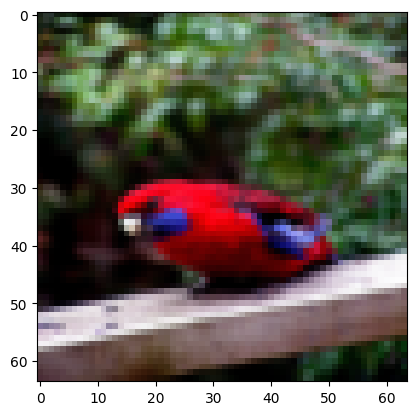

In [10]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

# Load the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Display an example image
index = 35
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")


## 📊 Explore the dataset

We inspect the shape and size of the dataset: number of training/test examples and image dimensions.


In [11]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[1].shape[0]

print("Number of training examples: m_train =", m_train)
print("Number of testing examples: m_test =", m_test)
print("Each image is of size:", (num_px, num_px, 3))
print("train_set_x shape:", train_set_x_orig.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_x shape:", test_set_x_orig.shape)
print("test_set_y shape:", test_set_y.shape)


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## 🧮 Preprocess the data

We flatten the images into vectors and standardize the pixel values (divide by 255).


In [12]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Sanity checks
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213])
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159])

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.


## 🧠 Define the sigmoid function

The sigmoid activation function is used to convert any real value to a probability between 0 and 1.


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## ⚙️ Initialize model parameters

We initialize the weights to zeros and the bias to 0.


In [14]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b


## 🔁 Forward and backward propagation

We implement forward propagation to compute the cost, and backward propagation to compute gradients.


In [15]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost


## 🧮 Optimize parameters using gradient descent

We minimize the cost function by updating `w` and `b` using their gradients.


In [16]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")

    return {"w": w, "b": b}, grads, costs


## 🔍 Predict using learned parameters

We use the trained model to predict whether the label is 0 or 1 for given examples.


In [17]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction


## 🧪 Build the logistic regression model

We combine all functions to train the model, make predictions, and return results.


In [18]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    return {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }

logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


## 📸 Visualize a test prediction

Let's visualize an image from the test set and compare the true label vs prediction.


y = 1, you predicted that it is a "cat" picture.


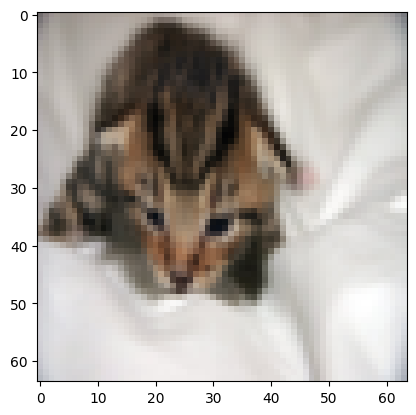

In [19]:
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" +
      classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") + "\" picture.")


## 📉 Plot the learning curve

This graph shows how the cost decreases with training iterations.


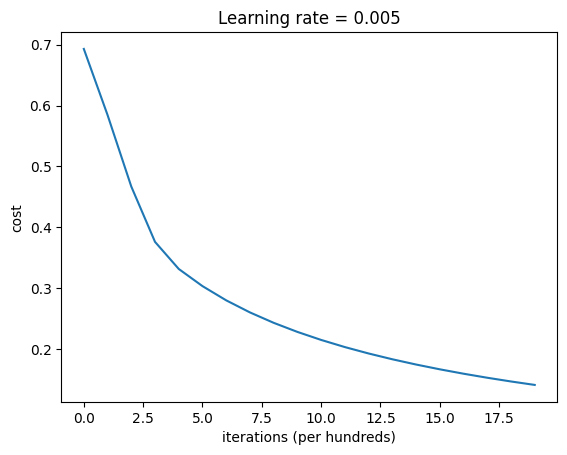

In [20]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(logistic_regression_model["learning_rate"]))
plt.show()


## 🚀 Compare different learning rates

We evaluate how different learning rates affect the cost function during training.


Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



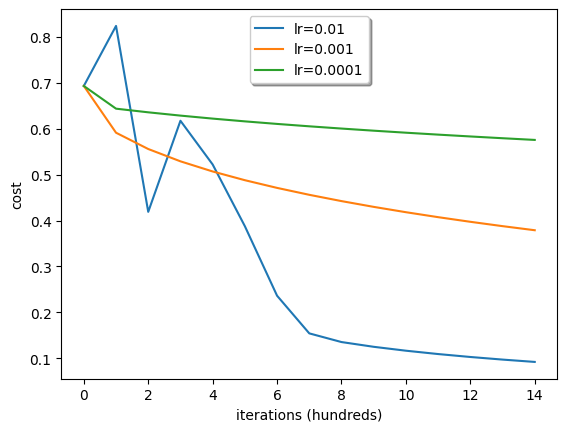

In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print("Training a model with learning rate:", lr)
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print("\n-------------------------------------------------------\n")

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label="lr=" + str(lr))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
plt.legend(loc='upper center', shadow=True)
plt.show()
